# Loan Approval Prediction - Comprehensive Analysis

## 1. Introduction

This notebook performs a thorough, step-by-step analysis and modeling of a loan dataset. Our goal is to predict whether a loan application will be approved (Loan_Status = Y or N). This notebook is divided into the following major sections:

1. **Introduction**  
2. **Dataset Loading & Initial Inspection**  
4. **Exploratory Data Analysis (EDA)**  
4. **Data Cleaning & Preprocessing**  
5. **Feature Engineering**  
6. **Model Building**  
7. **Model Evaluation**  
8. **Hyperparameter Tuning**  
9. **Conclusion & Next Steps**

We aim for transparency and clarity, ensuring that any data scientist following along will understand each decision.

---
## 2. Import Libraries and Helpers

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Ler o dataset
df = pd.read_csv('../data/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 3. Dataset Loading & Initial Inspection

### 3.1 Load the Data
The dataset is assumed to be in a file named `train.csv`. We'll load it using `pandas`.


In [26]:
# 3.1 Load the Data
df = pd.read_csv('../data/train.csv')  # or 'train.csv' depending on your structure

print("Shape of the dataset:", df.shape)
df.head()


Shape of the dataset: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 3.2 Quick Overview

We look at the columns, data types, and see if any immediate issues (e.g. missing values) stand out.


In [27]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Potential Observations**:
- You may find `Gender`, `LoanAmount`, or `Credit_History` have missing values.
- `info()` reveals data types (object, float64, int64) that can inform how we handle each column.

---

## 4. Exploratory Data Analysis (EDA)

In this section, we thoroughly explore the dataset to understand its distribution, relationships, and potential anomalies.

### 4.1 Descriptive Statistics
We start with basic numeric summaries (`.describe()`) to see means, medians, etc.


In [28]:
df.describe(include='all')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002990,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


Here, `include='all'` helps us see summaries for both numeric and categorical columns.

### 4.2 Distribution of Numeric Variables

Let’s analyze the distributions (histograms, boxplots) of numeric columns such as:
- `ApplicantIncome`
- `CoapplicantIncome`
- `LoanAmount`
- `Loan_Amount_Term`
- `Credit_History` (though it's numeric, it's often more like a category: 0 or 1)

We will also look for outliers using boxplots.


In [ ]:
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


**Observations** (example):
- `ApplicantIncome` might have a long tail (high-income outliers).
- `LoanAmount` might contain some outliers or missing values.
- `Credit_History` is often 0 or 1, so the histogram might appear like two bars.

### 4.3 Distribution of Categorical Variables

Categorical columns include:
- `Loan_ID` (unique, might not be very relevant for analysis)
- `Gender`
- `Married`
- `Dependents`
- `Education`
- `Self_Employed`
- `Property_Area`
- `Loan_Status` (our target)

Let’s see value counts and create countplots.
We’ll use `countplot_categorical` to visualize columns like `Gender`, `Married`, `Dependents`, `Education`, `Self_Employed`, `Property_Area`, and `Loan_Status`.


In [ ]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
            'Property_Area', 'Loan_Status']

for col in cat_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts(dropna=False))
    
    plt.figure()
    sns.countplot(x=df[col], palette='viridis')
    plt.title(f"{col} Distribution")
    plt.show()


**Observations** (example):
- `Gender` might be mostly "Male" with fewer "Female" entries.
- `Married` might have a majority "Yes" vs "No".
- `Loan_Status` distribution is crucial to see if the data is imbalanced.

### 4.4 Relationship Between Variables

#### 4.4.1 Correlation Heatmap (Numeric Only)

This helps us see how numeric features correlate with each other and with the target (after we convert `Loan_Status` to numeric temporarily if needed).


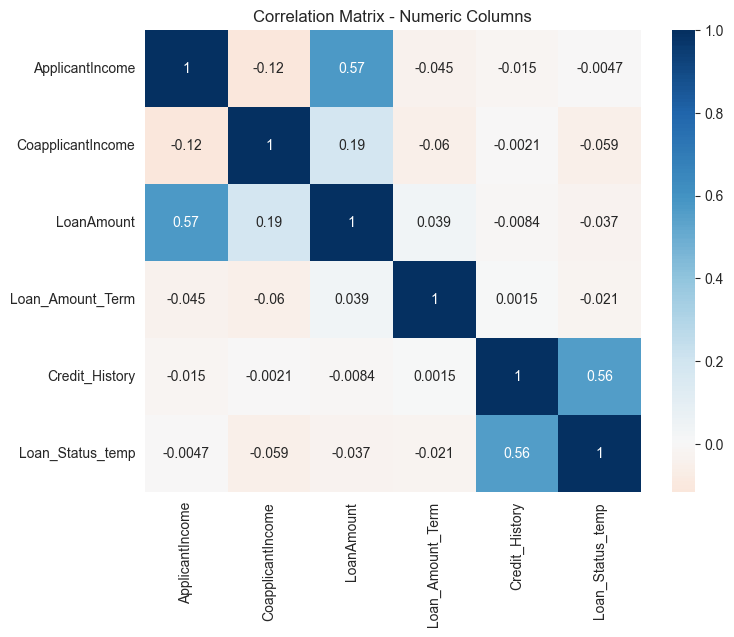

In [31]:
# Temporarily encode Loan_Status for correlation
df['Loan_Status_temp'] = df['Loan_Status'].map({'Y':1, 'N':0})

corr_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
             'Loan_Amount_Term', 'Credit_History', 'Loan_Status_temp']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', center=0)
plt.title("Correlation Matrix - Numeric Columns")
plt.show()

# Remove temp column
df.drop('Loan_Status_temp', axis=1, inplace=True)


**Insights**:
- Often, `Credit_History` is highly correlated with `Loan_Status`.
- `ApplicantIncome` and `CoapplicantIncome` might show correlation with `LoanAmount`.
- `Loan_Amount_Term` may not vary much if the dataset is standard.

### 4.5 Key EDA Takeaways

In a bullet list, you might note:
- Missing data patterns.
- Outliers in certain columns.
- Potential strong or weak correlations.
- Class imbalance in `Loan_Status` (if “Y” is significantly more or less frequent than “N”).

---

## 5. Data Cleaning & Preprocessing

In this section, we systematically address missing values, data type conversions, and outliers.

### 5.1 Handling Missing Values

We look at the missing value counts from before. Let’s do a targeted approach:


In [ ]:
# Example approach:
# 1. For numeric columns, fill with median or mean
# 2. For categorical columns, fill with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df.isnull().sum()


**Note**: The above is a simplistic approach. Sometimes, we might do advanced imputation (KNN-imputer, regression-based). But for demonstration, mode/median is often sufficient.

### 5.2 Outlier Treatment

- We might trim or cap outliers in `ApplicantIncome` or `LoanAmount`.
- Alternatively, use transformations (log scale, etc.).

In [ ]:
# Simple log transform example for skewed features
df['ApplicantIncome_log'] = np.log1p(df['ApplicantIncome'])
df['CoapplicantIncome_log'] = np.log1p(df['CoapplicantIncome'])
df['LoanAmount_log'] = np.log1p(df['LoanAmount'])


,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,128.0,360.0,1.0,1,True,False,False,False,False,False,False,False,True
1,LP001003,4583,1508.0,128.0,360.0,1.0,0,True,True,True,False,False,False,False,False,False
2,LP001005,3000,0.0,66.0,360.0,1.0,1,True,True,False,False,False,False,True,False,True
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,True,True,False,False,False,True,False,False,True
4,LP001008,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,False,False,False,False,True


---

## 6. Feature Engineering

### 6.1 Encoding Categorical Variables

We must encode strings into numbers. For `Loan_Status`, we map `Y -> 1, N -> 0`. For others, we can use `pd.get_dummies`.



In [ ]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

# List of columns to one-hot encode
cols_to_encode = ['Gender', 'Married', 'Dependents', 'Education',
                  'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)
df.head()


### 6.2 Creating Additional Features (Optional)

We can combine or derive new features, for example:
- `TotalIncome = ApplicantIncome + CoapplicantIncome`
- Ratios or other domain-specific transformations.



In [ ]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['IncomePerPerson'] = df['TotalIncome'] / (df['Dependents_1']+ df['Dependents_2']+ df['Dependents_3+'] + 1) # As an example, if we have dummy columns for Dependents


---

## 7. Model Building

### 7.1 Train-Test Split

We want to separate features (X) and target (y). Typically, an 80/20 or 70/30 split.

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
y = df['Loan_Status']
# We can drop ID columns or any that won't be used
X = df.drop(['Loan_ID','Loan_Status'], axis=1, errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


**Note**: We use `stratify=y` if we want balanced classes in train/test splits.

### 7.2 Model Selection

Let’s start with a **Logistic Regression** baseline, then compare with other classifiers like **RandomForest**.



In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


### 7.3 Predictions and Basic Evaluation


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", acc)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


---

## 8. Model Evaluation

### 8.1 Metrics Discussion

- **Accuracy**: proportion of correct predictions.
- **Precision & Recall**: critical if cost of false positives/negatives differs (e.g., for loans, a false negative might mean missing a good applicant, a false positive might mean approving a risky applicant).
- **F1-score**: harmonic mean of precision and recall.

### 8.2 ROC Curve & AUC (Optional)

We might check the area under the ROC curve for a more robust classification measure.


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_val = roc_auc_score(y_test, y_proba)
print("AUC:", auc_val)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc_val:.2f}')
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


---

## 9. Hyperparameter Tuning

Let’s try a **RandomForest** with `GridSearchCV` or `RandomizedSearchCV` to see if we can improve performance.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("RandomForest Accuracy:", acc_rf)


---

## 10. Conclusion

1. **Key Findings**:
   - Credit history appears very important in predicting loan approvals.
   - Simple models can achieve decent accuracy (e.g., ~80%+).

2. **Limitations**:
   - Data may be limited or missing key borrower attributes (e.g., credit scores, debt-to-income ratio in more detail).
   - Possible class imbalance in Loan_Status.


**End of Notebook**  
Thank you for reading through this comprehensive notebook!
